In [0]:
import pandas as pd #used for manipulating data (READ and WRITE)
import math
import numpy as np
from numpy import array
from sklearn.decomposition import PCA #skitlearn can be used to implement regression, nureal networks etc. In this case we'll use it to decompose a matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train_data.csv to train_data.csv


In [0]:
data = pd.read_csv("train_data.csv")
# data.info()

In [0]:
nominal = ["MSZoning", "LandContour","Utilities" , "Neighborhood", "BldgType","LotConfig" , "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "Foundation", "Heating", "CentralAir", "Electrical", "GarageType", "MiscFeature", "SaleType"]
ordinal = ["Street","Alley","LotShape","LandSlope", "Condition1", "Condition2", "HouseStyle",  "MasVnrType", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "SaleCondition"]
numerical = ["MSSubClass","MoSold", "LotFrontage", "LotArea", "YearBuilt", "YearRemodAdd","OverallQual","BsmtFullBath", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr","TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "YrSold"]
target = ['SalePrice']

In [0]:
# Drop columns with more than 200 "NA" entries
# data.dropna(axis = 1, thresh = 200, inplace = True)
data.replace({"NA": np.nan}, inplace = True)
cleaned_data = data.fillna(0)

In [0]:
categorical_data = cleaned_data.select_dtypes(include = ['object']).copy()
column_names = list(categorical_data.columns)

for feature in column_names:
  categorical_data[feature] = categorical_data[feature].astype('category')

for feature in ordinal:
  categorical_data[feature] = categorical_data[feature].cat.codes  

# categorical_data.head()

In [0]:
data_copy = categorical_data.copy()

data_copy = pd.concat([pd.get_dummies(data_copy[nominal]), data_copy], axis=1)
data_copy.drop(nominal, axis=1, inplace = True)

new_data = pd.concat([data_copy, cleaned_data[numerical], cleaned_data[target]], axis = 1)


In [8]:
# Another way of converting a dataframe to a matrix
all_features = list(new_data.columns)
all_features
X = new_data.loc[:,all_features].values
y = new_data.loc[:, ['SalePrice']].values
X

array([[     0.,      0.,      0., ...,      0.,   2008., 208500.],
       [     0.,      0.,      0., ...,      0.,   2007., 181500.],
       [     0.,      0.,      0., ...,      0.,   2008., 223500.],
       ...,
       [     0.,      0.,      0., ...,   2500.,   2010., 266500.],
       [     0.,      0.,      0., ...,      0.,   2010., 142125.],
       [     0.,      0.,      0., ...,      0.,   2008., 147500.]])

In [9]:
# Standardising the dataset
X = StandardScaler().fit_transform(X)
X

array([[-0.08304548, -0.21585871, -0.10526316, ..., -0.08768781,
         0.13877749,  0.34727322],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.08768781,
        -0.61443862,  0.00728832],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.08768781,
         0.13877749,  0.53615372],
       ...,
       [-0.08304548, -0.21585871, -0.10526316, ...,  4.95311151,
         1.64520971,  1.07761115],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.08768781,
         1.64520971, -0.48852299],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.08768781,
         0.13877749, -0.42084081]])

In [10]:
pca = PCA(n_components=2)
pc_s = pca.fit_transform(X)
pca_data = pd.DataFrame(pc_s, columns = ['PC_1', 'PC_2'])
final_data = pd.concat([pca_data, cleaned_data[target]], axis=1)
final_data

,PC_1,PC_2,SalePrice
0,3.068461,-0.566021,208500
1,0.214934,1.856224,181500
2,3.731383,-0.263048,223500
3,-1.629963,0.884861,140000
4,5.812478,-0.228145,250000
...,...,...,...
1455,1.873119,-2.670384,175000
1456,1.441140,4.806755,210000
1457,1.151711,-1.999713,266500
1458,-2.499300,3.739650,142125


In [11]:
# percentage of information carried by the above 2 Principal Component 
pca.explained_variance_ratio_

array([0.07191341, 0.03672561])

In [12]:
X = final_data.drop("SalePrice", 1)
y = final_data["SalePrice"]
print(X)
print(y)
regressor = LassoCV()
regressor.fit(X,y)

          PC_1      PC_2
0     3.068461 -0.566021
1     0.214934  1.856224
2     3.731383 -0.263048
3    -1.629963  0.884861
4     5.812478 -0.228145
...        ...       ...
1455  1.873119 -2.670384
1456  1.441140  4.806755
1457  1.151711 -1.999713
1458 -2.499300  3.739650
1459 -0.501692  3.809751

[1460 rows x 2 columns]
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [0]:
# get the weights and intercepts
w1 = regressor.coef_[0]
w2 = regressor.coef_[1]
b = regressor.intercept_

3D Plane of Best Fit

In [15]:
# get an array of the pca dataframe excluding the SalePrice
final_data_array = np.array(final_data.drop("SalePrice", 1))
final_data_array

array([[ 3.06846135, -0.56602094],
       [ 0.21493402,  1.85622446],
       [ 3.73138346, -0.26304805],
       ...,
       [ 1.15171084, -1.99971349],
       [-2.49929967,  3.73964997],
       [-0.50169172,  3.80975094]])

In [16]:
# find minimum and maximum values in the array
minimum = np.min(final_data_array, axis = 0)
maximum = np.max(final_data_array, axis = 0)
minimum, maximum

(array([-10.85904254,  -7.40336101]), array([15.75940782, 10.48793209]))

In [17]:
# get an array of linearly spaced elements with the min and max values as limits
x = np.linspace(minimum[0], maximum[0], 20)
y = np.linspace(minimum[1], maximum[1], 20)
x, y

(array([-10.85904254,  -9.45807147,  -8.0571004 ,  -6.65612932,
         -5.25515825,  -3.85418718,  -2.45321611,  -1.05224504,
          0.34872604,   1.74969711,   3.15066818,   4.55163925,
          5.95261032,   7.35358139,   8.75455247,  10.15552354,
         11.55649461,  12.95746568,  14.35843675,  15.75940782]),
 array([-7.40336101, -6.46171401, -5.520067  , -4.57842   , -3.63677299,
        -2.69512599, -1.75347898, -0.81183198,  0.12981503,  1.07146204,
         2.01310904,  2.95475605,  3.89640305,  4.83805006,  5.77969706,
         6.72134407,  7.66299107,  8.60463808,  9.54628508, 10.48793209]))

In [0]:
# get 2 2D arrays representing X and Y coordinates
X, Y = np.meshgrid(x, y) 
Z = w1*X + w2*Y + b

Text(0.5, 0.92, 'PCA on the House Prices data set')

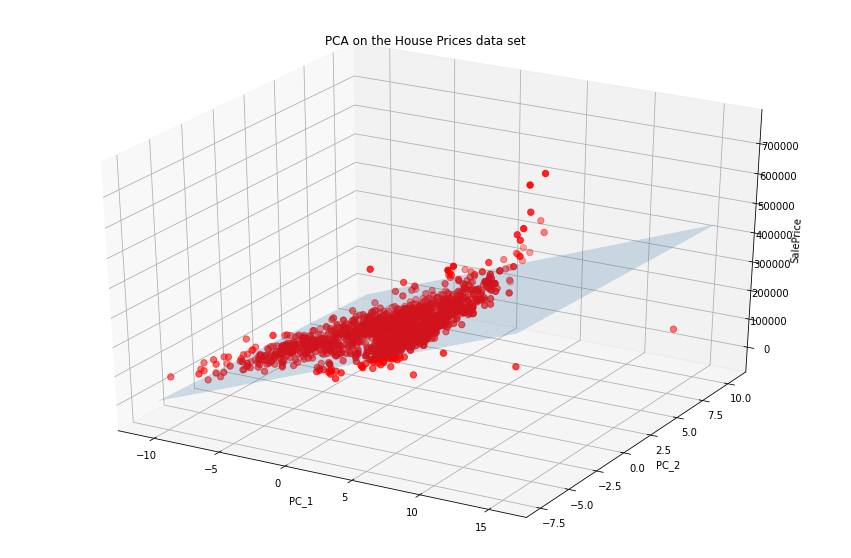

In [22]:
# Plot initialisation
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(final_data['PC_1'], final_data['PC_2'], final_data['SalePrice'], c='r', s=40)
 
# label the axes
ax.set_xlabel("PC_1")
ax.set_ylabel("PC_2")
ax.set_zlabel("SalePrice")
ax.set_title("PCA on the House Prices data set")
#plt.show()